In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

In [76]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [77]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [78]:
LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [79]:
N_TRAIN_SAMPLES = 10000
N_VAL_SAMPLES = 5000
N_TEST_SAMPLES = 10000
N_CLASSES = 10

In [80]:
x_val = x_train[:N_VAL_SAMPLES].copy()
y_val = y_train[:N_VAL_SAMPLES].copy()

x_train = x_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()
y_train = y_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()


In [81]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation images shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

Train images shape: (10000, 32, 32, 3)
Train labels shape: (10000, 1)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 1)


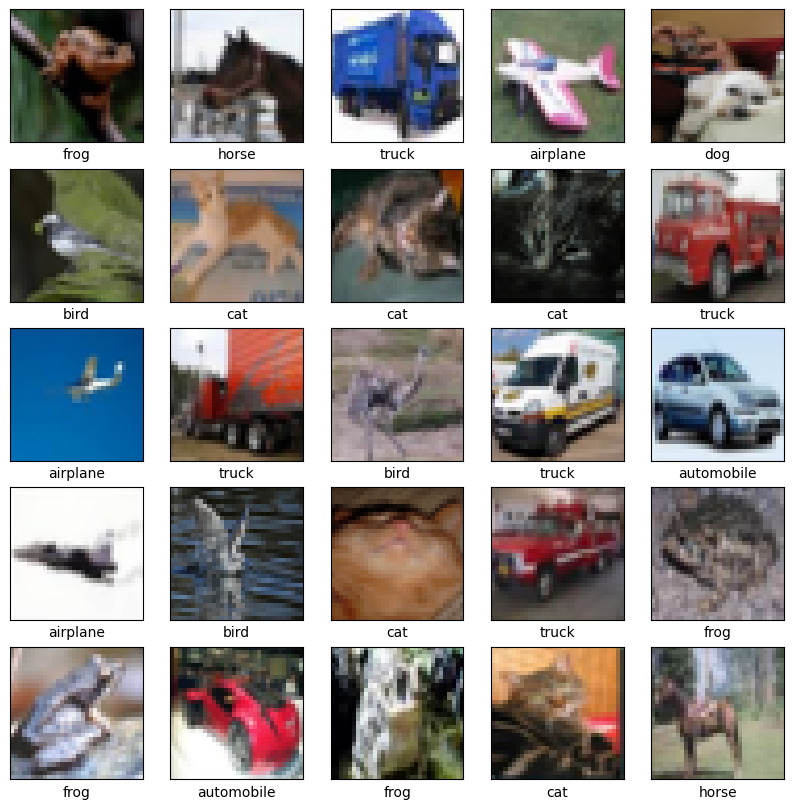

In [82]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(LABELS[y_train[i][0]])

plt.show()

In [83]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)
y_val = to_categorical(y_val, N_CLASSES)

In [84]:
model = keras.models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=N_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 2048)             

In [85]:
model.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'])

In [86]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
157/157 [==============================] - 3s 16ms/step - loss: 2.0278 - accuracy: 0.2579 - val_loss: 1.9431 - val_accuracy: 0.2838
Epoch 2/20
157/157 [==============================] - 2s 10ms/step - loss: 1.7007 - accuracy: 0.3902 - val_loss: 1.5573 - val_accuracy: 0.4274
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 1.5390 - accuracy: 0.4436 - val_loss: 1.5537 - val_accuracy: 0.4308
Epoch 4/20
157/157 [==============================] - 1s 9ms/step - loss: 1.4265 - accuracy: 0.4910 - val_loss: 1.5266 - val_accuracy: 0.4678
Epoch 5/20
157/157 [==============================] - 2s 10ms/step - loss: 1.3277 - accuracy: 0.5289 - val_loss: 1.5552 - val_accuracy: 0.4412
Epoch 6/20
157/157 [==============================] - 2s 10ms/step - loss: 1.2638 - accuracy: 0.5518 - val_loss: 1.3236 - val_accuracy: 0.5314
Epoch 7/20
157/157 [==============================] - 2s 10ms/step - loss: 1.1785 - accuracy: 0.5850 - val_loss: 1.3150 - val_accuracy: 0.5240
E